In [44]:
from sklearn import datasets
import numpy as np

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Split Dataset
from sklearn.model_selection import train_test_split
# Standardization 
from sklearn.preprocessing import StandardScaler

# Perceptron Linear Model
from sklearn.linear_model import Perceptron

# Model Metrics
from sklearn.metrics import accuracy_score


In [45]:
iris = datasets.load_iris()

In [46]:
X = iris.data[:, [2, 3]]
y = iris.target

In [47]:
print("Class Labels: ", np.unique(y))

Class Labels:  [0 1 2]


In [48]:
# stratify => Return Same Label Proportion to Training and Test Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [49]:
sc = StandardScaler()
# Assess Mu & Std to each feature dimension
sc.fit(X_train) 

# Standardize dataset 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [50]:
ppn = Perceptron(n_iter_no_change=40, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, n_iter_no_change=40, random_state=1)

In [51]:
pred = ppn.predict(X_test_std)

In [52]:
print("Accuracy: %.2f" % accuracy_score(y_test, pred))
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy: 0.93
Accuracy: 0.93


In [76]:
def decision_region(X, y, classifier, test_idx=None, resolution=0.02):
      # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

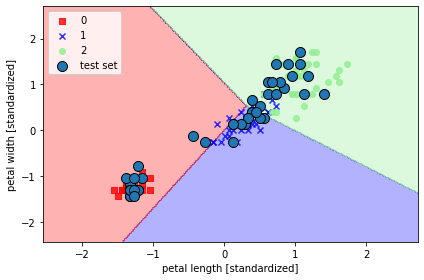

In [77]:
# X_combined_std = np.vstack((X_train_std, X_test_std))
# y_combined = np.hstack((y_train, y_test))
# decision_region(X=X_combined_std, y=y_combined, classfier==ppn, test_idx=range(105, 150))

# plt.xlabel("Petal Length")
# plt.ylabel("Sepal Length")
# plt.legend(loc="upper left")
# plt.show()
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

decision_region(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()